This notebook is similar to satellites.ipynb, but has extra investigation and plotting. The other one is the "clean" version to be turned in.

# Satellite Orbits
The data used in this analysis Joint Spectrum Center Equipment, Tactical, Space (JETS) database. The complete data set contained 55 data fields and 9539 satellite records. The majority of the records did not contain orbital parameter data, were duplicates, or were labeled as "dummy" or "filler data". The data set was cleaned to remove those records as well as all CUI data. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

The goal of this project is to predict the Orbit Type from other satellite data. 

Load data  

In [36]:
df = pd.read_csv('satellites.csv',index_col='Index')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 22 to 9533
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Apogee (km)                              1022 non-null   float64
 1   Argument of Perigee (deg)                1022 non-null   float64
 2   Eccentricity                             1022 non-null   float64
 3   Inclination Angle (deg)                  1022 non-null   float64
 4   Mean Anomaly (deg)                       1022 non-null   float64
 5   Mean Motion (revs/day)                   1022 non-null   float64
 6   Perigee (km)                             1022 non-null   float64
 7   Period (minutes)                         1022 non-null   float64
 8   Right Ascension of Ascending Node (deg)  1022 non-null   float64
 9   Satellite Height (km)                    1022 non-null   float64
 10  Orbit Type                               1022 non-nu

In [4]:
df.describe()

,Apogee (km),Argument of Perigee (deg),Eccentricity,Inclination Angle (deg),Mean Anomaly (deg),Mean Motion (revs/day),Perigee (km),Period (minutes),Right Ascension of Ascending Node (deg),Satellite Height (km)
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,18893.024187,160.871414,0.038223,48.919547,190.126302,7.888673,15128.323281,742.799433,172.082618,15996.263209
std,30079.524649,100.832591,0.154666,40.300035,97.115036,6.514777,16486.194550,1177.139558,102.449239,17984.443023
min,208.682300,0.148600,0.000004,0.002700,0.162100,0.068866,94.604500,88.693800,0.147200,184.820900
25%,776.400850,78.460950,0.000235,1.942750,113.320825,1.002715,742.206375,100.402500,75.288750,780.369475
50%,1742.729450,145.729150,0.000425,52.008050,195.379450,12.384964,1413.203450,116.223400,175.847100,1493.934900
75%,35798.331200,250.420950,0.001770,86.448800,274.169525,14.342199,35775.315625,1436.036975,259.768675,35789.065475
max,489399.673000,359.924500,0.971837,143.465900,359.990000,16.236741,57448.360000,20879.278000,359.657300,203447.203000


View the target data (Orbit Type)

Orbit Type
S4G    245
S42    223
S45    194
S43     91
S4A     85
S4I     70
S4J     43
S4K     27
S4V     11
S4H      9
S46      5
S4E      5
S4D      4
S44      4
S4M      3
S4W      2
S4C      1
Name: count, dtype: int64


<Axes: xlabel='Orbit Type', ylabel='Count'>

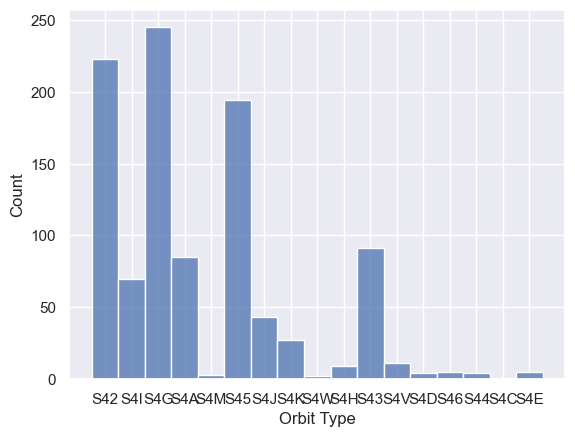

In [5]:
print(df['Orbit Type'].value_counts())
sns.histplot(data=df,x='Orbit Type')

The the classes are imbalanced, it may be possible to adjust the classes into broader groups.

In [6]:
orbit_codes = pd.read_csv('orbit_codes.csv')
orbit_codes.head()

,Orbit Type,Orbit
0,S41,LEO
1,S42,LEO SUN-SYNCHRONOUS
2,S43,LEO POLAR
3,S44,LEO EQUATORIAL
4,S45,LEO INTERMEDIATE


In [7]:
pd.DataFrame(df['Orbit Type'].value_counts()).merge(orbit_codes,on='Orbit Type')

,Orbit Type,count,Orbit
0,S4G,245,GEO STATIONARY
1,S42,223,LEO SUN-SYNCHRONOUS
2,S45,194,LEO INTERMEDIATE
3,S43,91,LEO POLAR
4,S4A,85,MEO
5,S4I,70,GEO INCLINED DRIFT
6,S4J,43,GEO INCLINED
7,S4K,27,HIGHLY ELLIPTIC (HEO)
8,S4V,11,DEEP ECCENTRIC
9,S4H,9,GEO DRIFT


In [8]:
orbit_classes = {'GEO': ['S4D','S4E','S4G','S4H','S4I','S4J'],
                 'LEO': ['S41','S42','S43','S44','S45','S46'],
                 'MEO': ['S4A'],
                 'HEO': ['S4K','S4M'],
                 'Other': ['S4C','S4V','S4W']}

In [9]:
orb_typ = {}
for key,value in orbit_classes.items():
    for code in value:
        orb_typ[code] = key
orb_typ

{'S4D': 'GEO',
 'S4E': 'GEO',
 'S4G': 'GEO',
 'S4H': 'GEO',
 'S4I': 'GEO',
 'S4J': 'GEO',
 'S41': 'LEO',
 'S42': 'LEO',
 'S43': 'LEO',
 'S44': 'LEO',
 'S45': 'LEO',
 'S46': 'LEO',
 'S4A': 'MEO',
 'S4K': 'HEO',
 'S4M': 'HEO',
 'S4C': 'Other',
 'S4V': 'Other',
 'S4W': 'Other'}

In [37]:
df['Orbit'] = df.loc[:,('Orbit Type')].map(orb_typ)

Orbit
LEO      517
GEO      376
MEO       85
HEO       30
Other     14
Name: count, dtype: int64


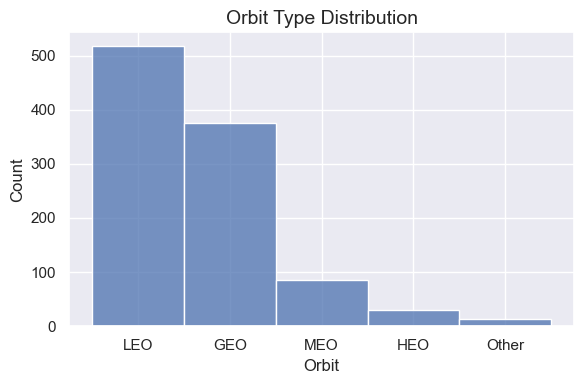

In [11]:
print(df['Orbit'].value_counts())
sns.set(font_scale=1.0) 
fig,ax = plt.subplots(figsize=(6,4))
sns.histplot(data=df,x='Orbit',ax=ax)
ax.set_title('Orbit Type Distribution',fontsize=14)
fig.tight_layout()
fig.savefig('orbit_distribution.png',dpi=300)

Look at distributions of other data.

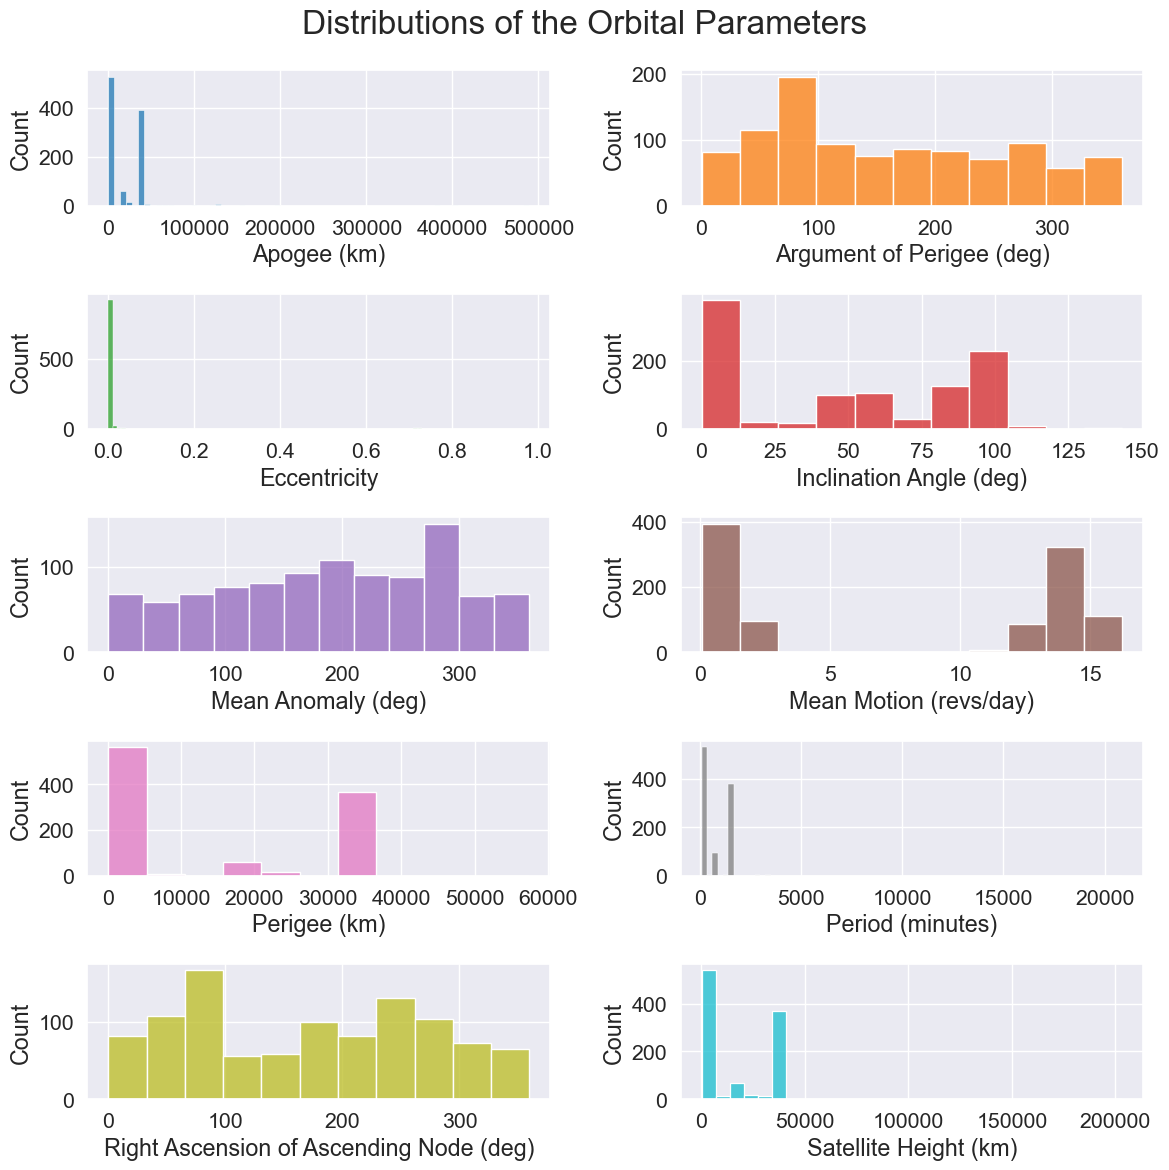

In [12]:
cmap = sns.color_palette('tab10')
sns.set(font_scale=1.4) 

fig, axs = plt.subplots(nrows=5,ncols=2,figsize=(12,12))
for idx, column in enumerate(df.drop(['Orbit Type','Orbit'],axis=1).columns):
    if column == 'Eccentricity':
        sns.histplot(data=df, x=column, ax=axs.flatten()[idx], color=cmap[idx], binwidth=.01)        
    else:
        sns.histplot(data=df, x=column, ax=axs.flatten()[idx], color=cmap[idx])
fig.suptitle('Distributions of the Orbital Parameters',fontsize=24)
fig.tight_layout()
fig.savefig('variable_distributions.png',dpi=300)

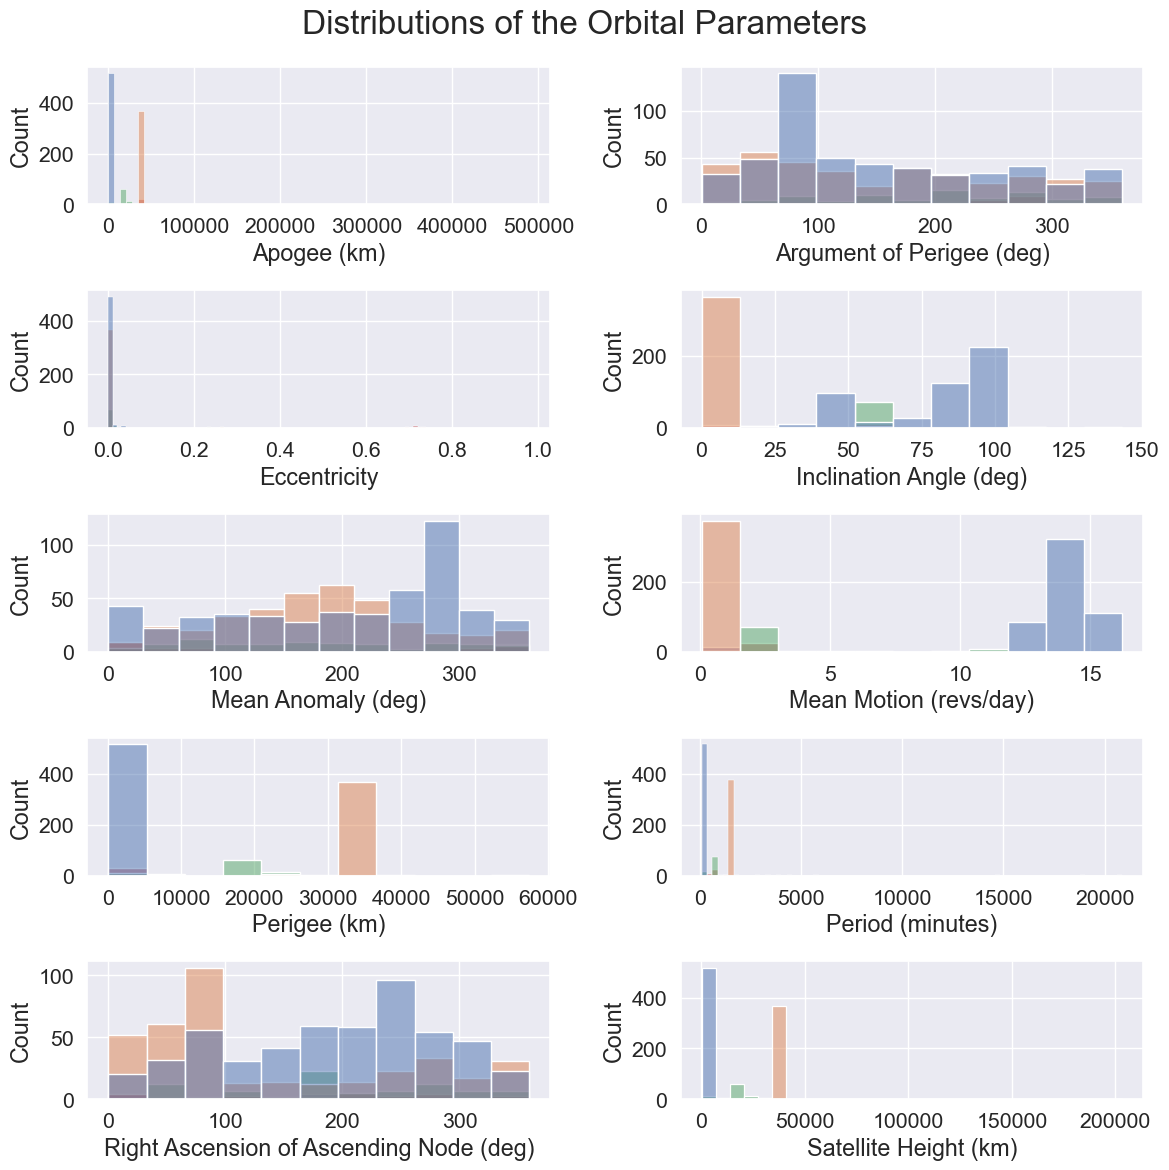

In [13]:
sns.set(font_scale=1.4) 

fig, axs = plt.subplots(nrows=5,ncols=2,figsize=(12,12))
for idx, column in enumerate(df.drop(['Orbit Type','Orbit'],axis=1).columns):
    if column == 'Eccentricity':
        sns.histplot(data=df, x=column, ax=axs.flatten()[idx], binwidth=.01, hue='Orbit')
        axs.flatten()[idx].get_legend().remove()
    else:
        sns.histplot(data=df, x=column, ax=axs.flatten()[idx], hue='Orbit')
        axs.flatten()[idx].get_legend().remove()
fig.suptitle('Distributions of the Orbital Parameters',fontsize=24)
fig.tight_layout()

In [14]:
# cmap = sns.color_palette("tab10")
# for idx,column in enumerate(df.drop(['Orbit Type','Orbit'],axis=1).columns):
#     fig,ax = plt.subplots()
#     sns.histplot(data=df, x=column,ax=ax,color=cmap[idx])
#     fig.tight_layout()

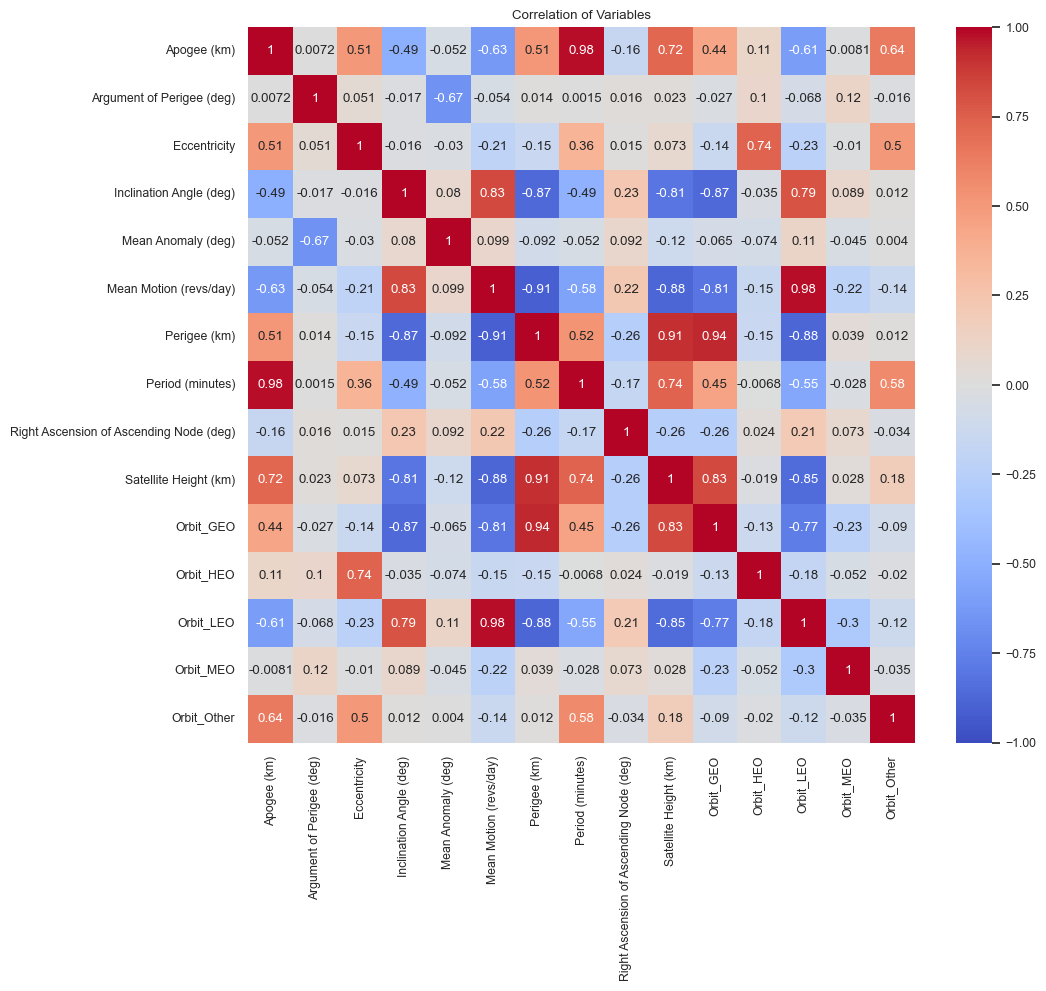

In [15]:
df_ohe = pd.get_dummies(df.drop('Orbit Type',axis=1), drop_first=False, dtype=int)
sns.set(font_scale=.8) 
fig, ax = plt.subplots(figsize=(11,10))
sns.heatmap(df_ohe.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
ax.set_title('Correlation of Variables')
fig.tight_layout()

C:\Users\elder\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


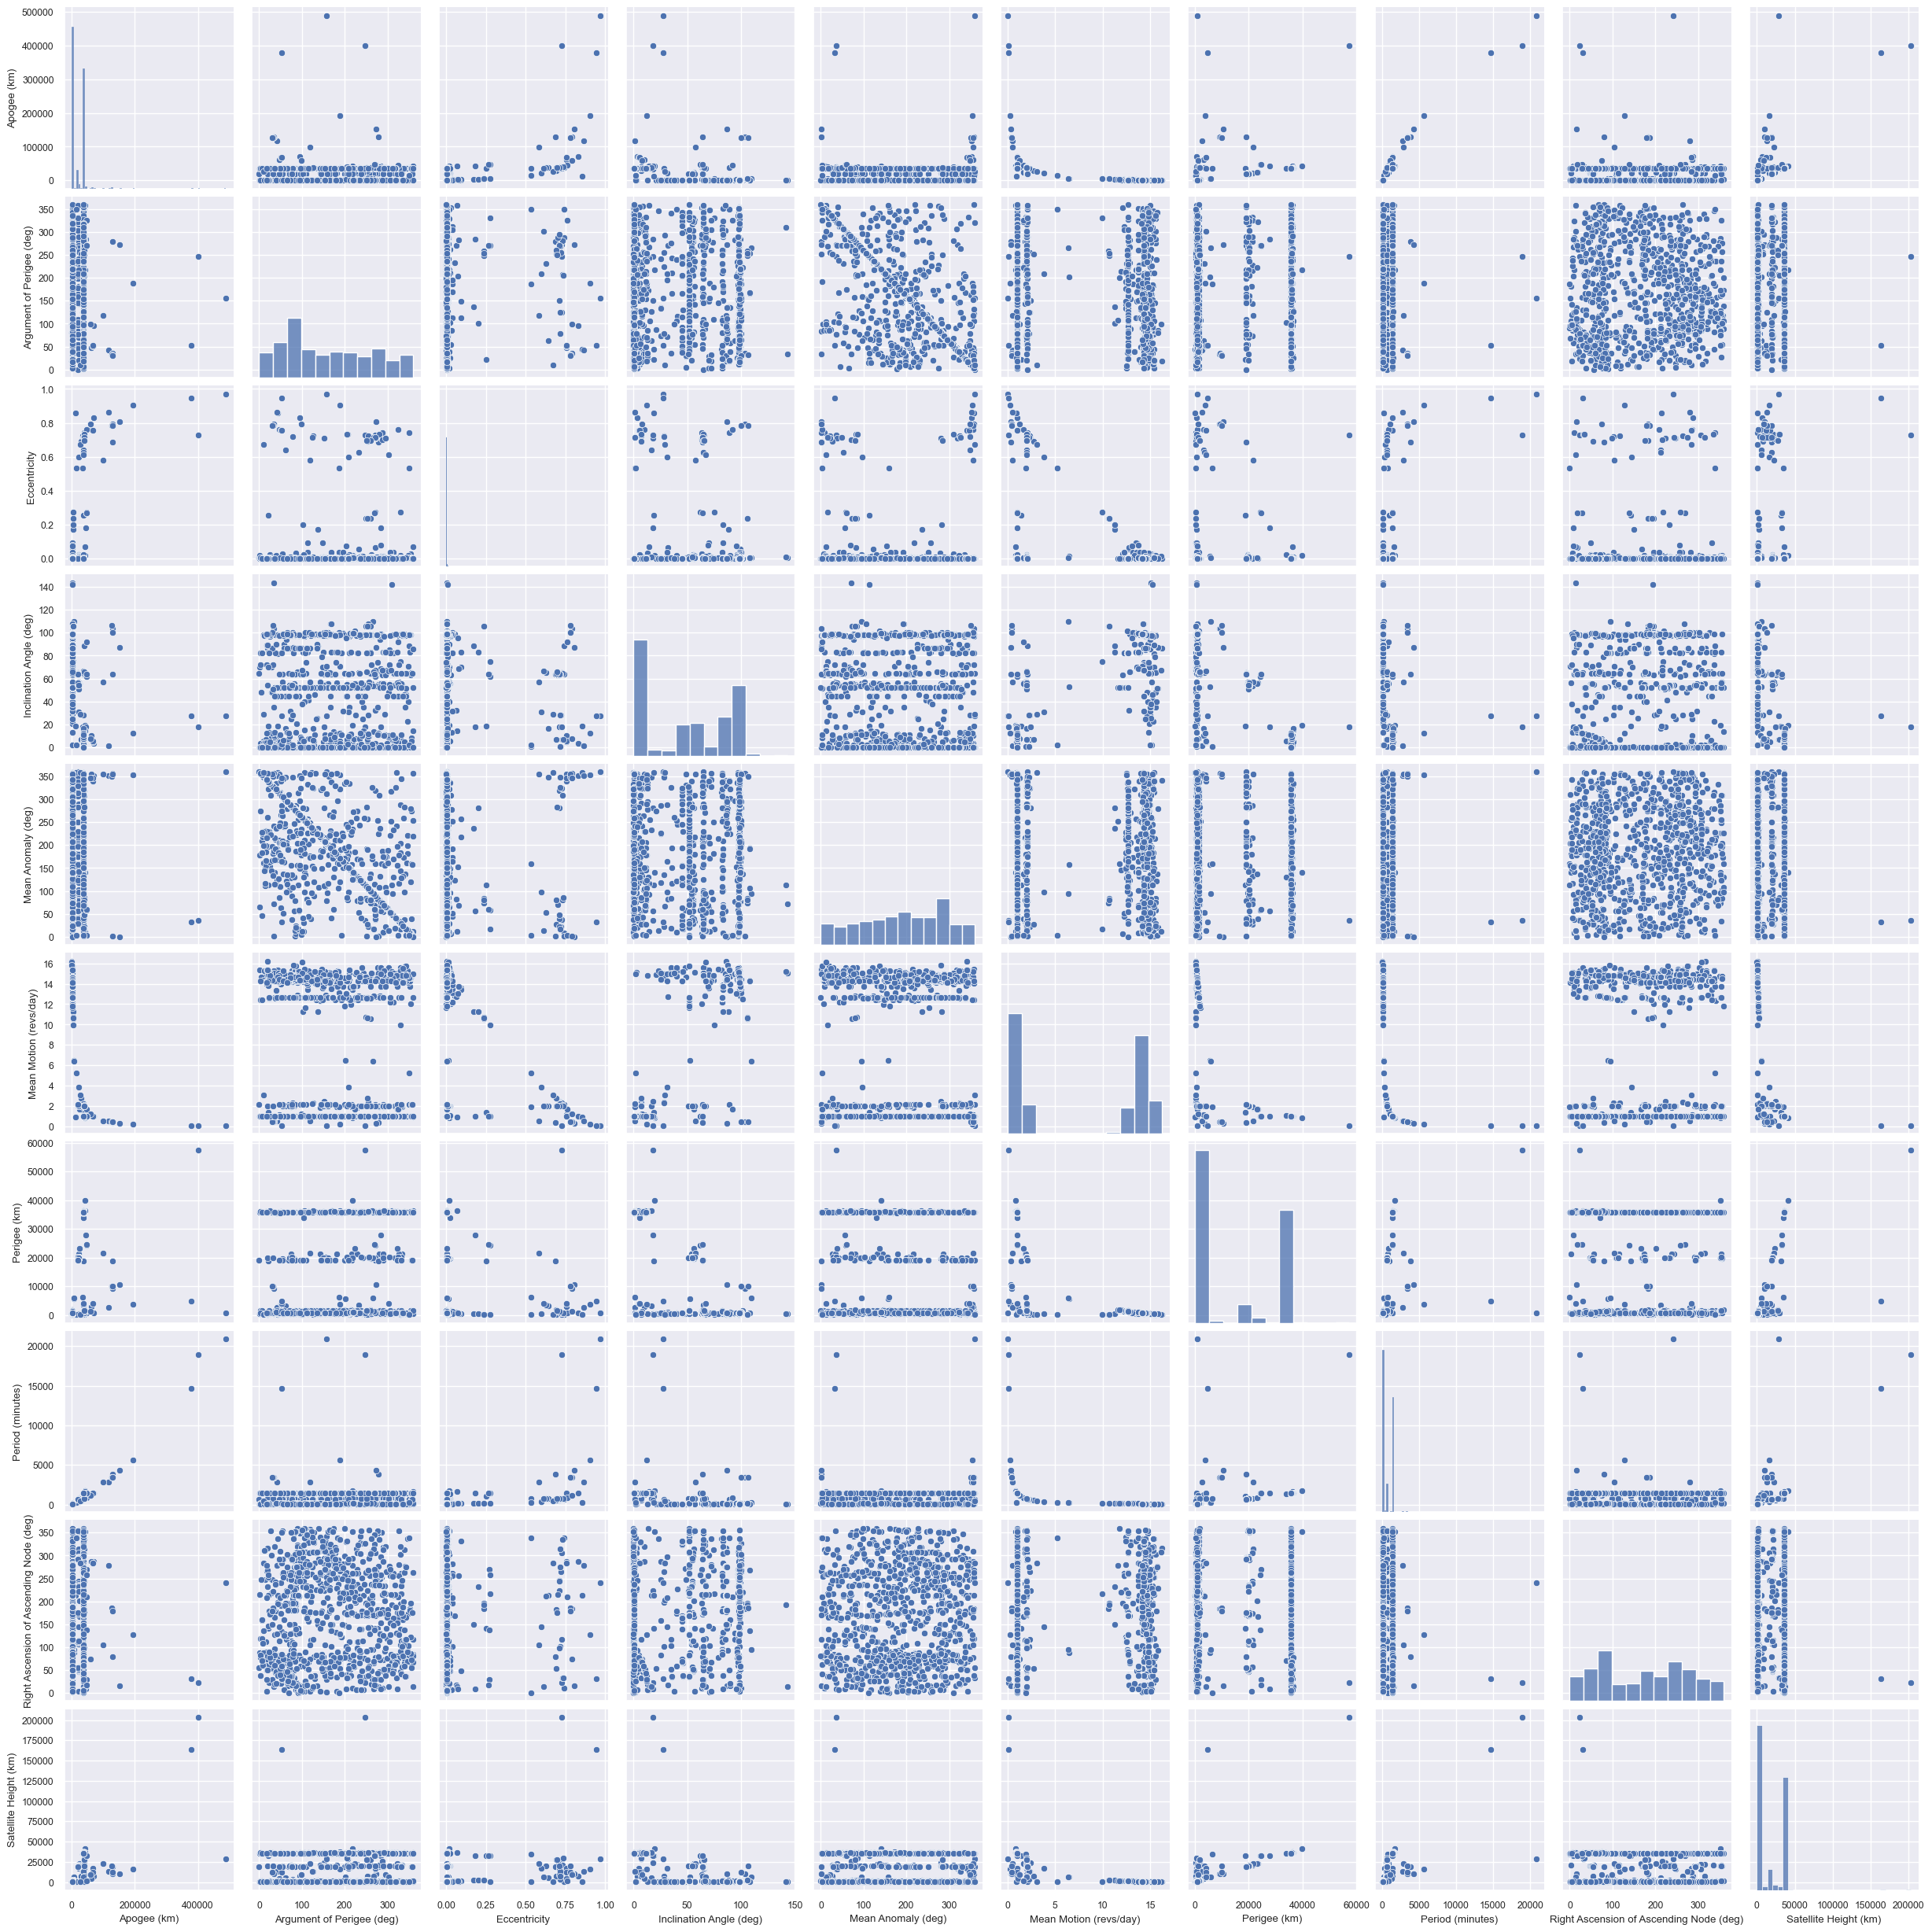

In [16]:
sns.pairplot(df.drop(['Orbit Type','Orbit'],axis=1))
plt.show()

A few of the scatter plots appear to have some groupings. Some of the most predominant are:
* Eccentricity and Mean Motion
* Eccentricity and Mean Anomaly
* Argument of Perigee and Perigee
* Right Ascension of Ascending Node and Perigee
* Mean Anomaly and Perigee  

Apogee and Period also appear to have clusters on several plots but they appear tighter due to a few outliers.  
It it clear that the orbits beyond GEO

Look at several scatter plots with the Orbits identified

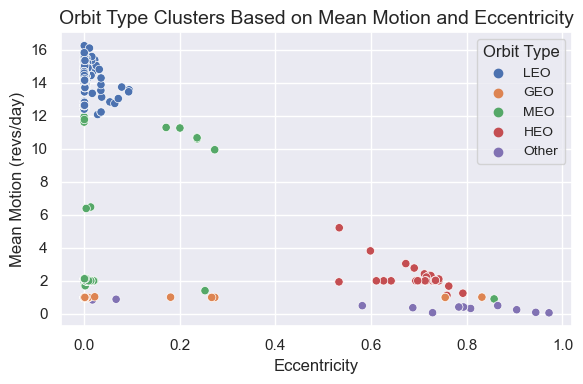

In [17]:
sns.set(font_scale=1.0) 
fig,ax = plt.subplots(figsize=(6,4))
sns.scatterplot(data=df, x='Eccentricity', y='Mean Motion (revs/day)', ax=ax, hue='Orbit')
ax.set_title('Orbit Type Clusters Based on Mean Motion and Eccentricity',fontsize=14)
ax.legend(fontsize=10,title='Orbit Type')
fig.tight_layout()
fig.savefig('eccent_mean_motion.png',dpi=300)

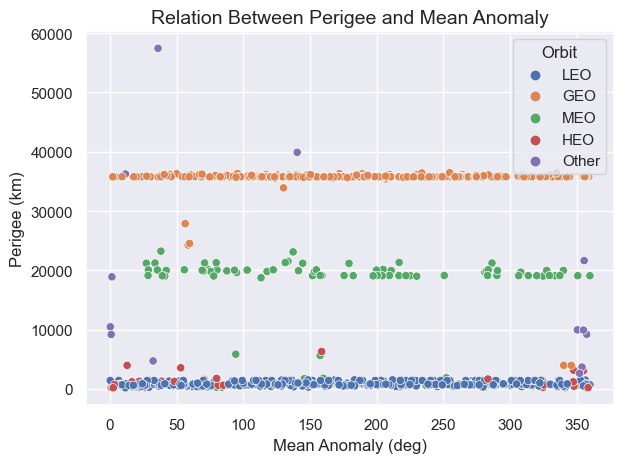

In [18]:
sns.set(font_scale=1.0) 
fig,ax = plt.subplots()
sns.scatterplot(data=df, x='Mean Anomaly (deg)', y='Perigee (km)', ax=ax, hue='Orbit')
ax.set_title('Relation Between Perigee and Mean Anomaly',fontsize=14)
fig.tight_layout()
fig.savefig('mean_anom_perigee.png',dpi=300)

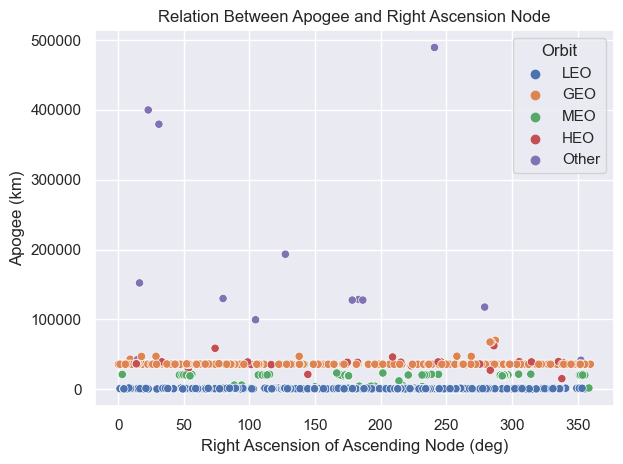

In [19]:
fig,ax = plt.subplots()
sns.scatterplot(data=df, x='Right Ascension of Ascending Node (deg)', y='Apogee (km)', ax=ax, hue='Orbit')
ax.set_title('Relation Between Apogee and Right Ascension Node')
fig.tight_layout()
fig.savefig('apogee_RA.png',dpi=300)

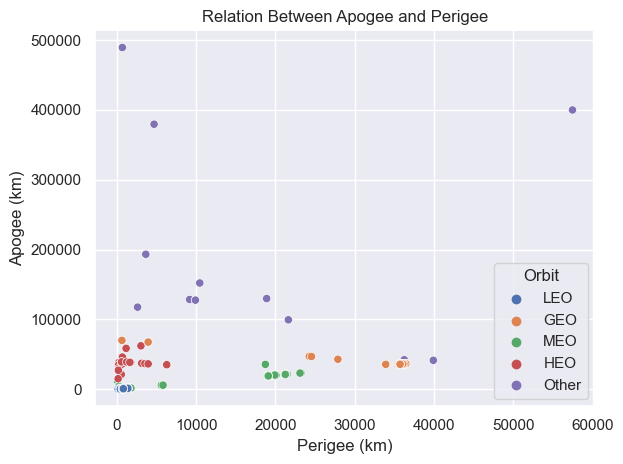

In [20]:
fig,ax = plt.subplots()
sns.scatterplot(data=df, x='Perigee (km)', y='Apogee (km)', ax=ax, hue='Orbit')
ax.set_title('Relation Between Apogee and Perigee')
fig.tight_layout()
fig.savefig('apogee_perigee.png',dpi=300)

<Axes: xlabel='Eccentricity', ylabel='Count'>

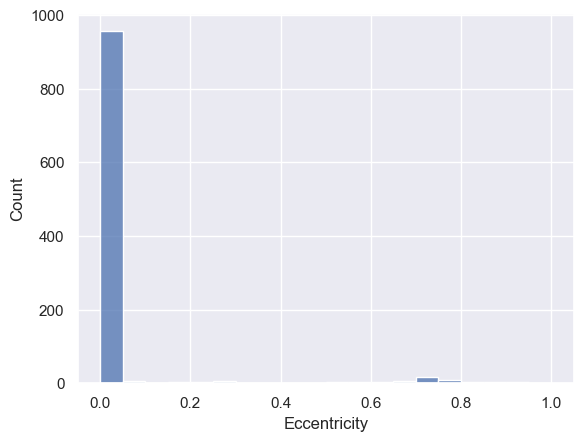

In [21]:
sns.histplot(data=df, x='Eccentricity', binwidth=.05)

---
# Explore Data Possible Erroneous Data

## Look at GEOs and MEOs that could be HEOs 

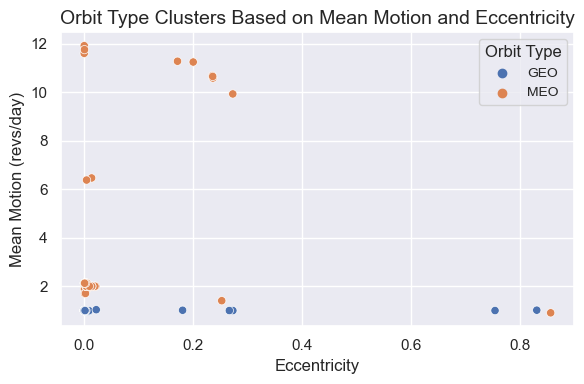

In [22]:
fig,ax = plt.subplots(figsize=(6,4))
sns.scatterplot(data=df[(df['Orbit']=='GEO')|(df['Orbit']=='MEO')], x='Eccentricity', y='Mean Motion (revs/day)', ax=ax, hue='Orbit')
ax.set_title('Orbit Type Clusters Based on Mean Motion and Eccentricity',fontsize=14)
ax.legend(fontsize=10,title='Orbit Type')
fig.tight_layout()

Will look at Eccentricity > 0.1 to be sure

In [23]:
df[((df['Orbit']=='GEO') | (df['Orbit']=='MEO')) & (df['Eccentricity']>0.1)].sort_values(by='Orbit')

,Apogee (km),Argument of Perigee (deg),Eccentricity,Inclination Angle (deg),Mean Anomaly (deg),Mean Motion (revs/day),Perigee (km),Period (minutes),Right Ascension of Ascending Node (deg),Satellite Height (km),Orbit Type,Orbit
Index,,,,,,,,,,,,
9404,47033.8477,270.1288,0.266749,63.7908,59.6108,1.002714,24539.0904,1436.0956,17.7669,32741.1498,S4E,GEO
9139,47150.4406,269.9507,0.269506,63.8982,59.5218,1.002704,24423.0479,1436.1097,28.8141,32707.4579,S4E,GEO
9067,47189.8110,268.9753,0.270552,63.6705,60.2501,1.002838,24376.2189,1435.9745,137.8761,32895.2034,S4E,GEO
4246,70060.7275,95.1963,0.831553,3.3615,352.5169,1.018490,651.8993,1413.4013,287.3118,7064.0957,S4D,GEO
9030,47092.9290,269.4703,0.268174,63.0622,60.1289,1.002743,24478.4469,1436.0793,268.9307,32871.9093,S4E,GEO
8208,67620.9711,52.0799,0.754875,5.4973,345.9286,1.002741,3958.2409,1435.4969,283.2335,12632.4820,S4D,GEO
5109,43003.0898,284.1840,0.180869,17.7963,56.3607,1.015261,27876.0460,1418.2901,9.0939,32350.2694,S4D,GEO
8206,67614.5604,51.0369,0.754721,4.9684,340.2469,1.002740,3964.7512,1435.4923,284.1996,17329.7094,S4D,GEO
9402,47303.8098,270.8309,0.273240,61.8752,58.5461,1.002825,24262.7487,1435.9521,257.9603,32507.5208,S4E,GEO


I checked the corresponding catalog numbers (in the original dataset) on Space-Track and a few were incorrect, should be

### HEO not GEO
* 4246  
* 8206  
* 8208 

### HEO not MEO
* 4662

### GEO not MEO
* 269 

### LEO not MEO
* 7684 
* 4846 
* 1619
* 433
* 7687
* 7686


Confirmed these were correct
### GEO  
* 5109  
* 9030  
* 9067  
* 9139  
* 9402  
* 9404





## Check MEO that could be LEO (high mean motion)
Will use Mean Motion > 10 revs/day

In [24]:
df[(df['Mean Motion (revs/day)']>10) & (df['Orbit'] != 'LEO')]

,Apogee (km),Argument of Perigee (deg),Eccentricity,Inclination Angle (deg),Mean Anomaly (deg),Mean Motion (revs/day),Perigee (km),Period (minutes),Right Ascension of Ascending Node (deg),Satellite Height (km),Orbit Type,Orbit
Index,,,,,,,,,,,,
1619,3452.6047,137.6163,0.171517,88.4479,237.1020,11.288450,574.0439,127.5648,149.7971,2908.9070,S4A,MEO
4846,3714.2600,101.3381,0.200342,82.9618,281.8117,11.255456,345.3386,127.9372,231.5244,2025.3964,S4A,MEO
6869,1859.4508,107.7905,0.000088,52.0040,252.3009,11.614209,1857.9929,123.9404,277.7885,1859.1787,S4A,MEO
7684,4446.9578,259.3034,0.236513,105.6509,73.5193,10.594837,305.8323,135.9072,183.5557,2274.2801,S4A,MEO
7686,4373.0734,249.3427,0.235605,105.6653,84.0639,10.692400,272.9996,134.6670,195.4661,2593.2884,S4A,MEO
7687,4399.4053,253.1783,0.236175,105.6777,79.8729,10.660633,281.2386,135.0683,192.5900,2466.1884,S4A,MEO
8618,1714.1805,214.3233,0.000150,51.9974,145.7509,11.929546,1711.6933,120.6626,220.5708,1714.2160,S4A,MEO
8898,1792.0520,200.0491,0.000572,51.9816,160.0110,11.766775,1782.7041,122.3326,358.5169,1792.0446,S4A,MEO


1619, 4846, 7684, 7686, 7687 already confirmed to be LEO  
The other three were also LEOs

### Also LEO not MEO
* 6869
* 8618
* 8898




In [25]:
shouldBe_HEO = [4246,8206,8208,4662]
shouldBe_GEO = [269]
shouldBe_LEO = [7684,4846,1619,433,7687,7686,6869,8618,8898]
change_to_dict = {'LEO':shouldBe_LEO,'GEO':shouldBe_GEO,'HEO':shouldBe_HEO,}

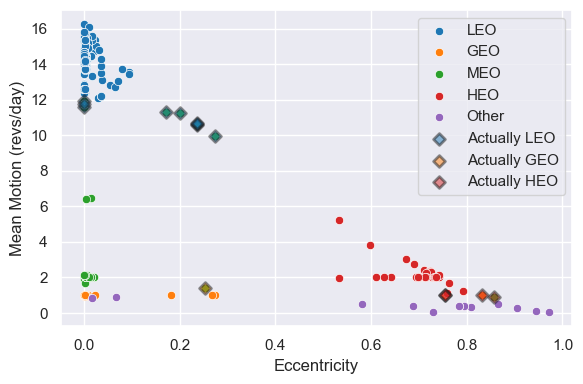

In [26]:
fig,ax = plt.subplots(figsize=(6,4))
for idx, orbit in enumerate(['LEO','GEO','MEO','HEO','Other']):
    sns.scatterplot(data=df[df['Orbit']==orbit], x='Eccentricity', y='Mean Motion (revs/day)', ax=ax, label=orbit,color=cmap[idx])

for idx, orbit in enumerate(['LEO','GEO','MEO','HEO','Other']):
    if orbit in change_to_dict.keys():
        sns.scatterplot(data=df.loc[change_to_dict[orbit]], x='Eccentricity', y='Mean Motion (revs/day)', ax=ax, label=f'Actually {orbit}', marker='D', color=cmap[idx], alpha=0.5, edgecolor='k',linewidth=2)

fig.tight_layout()

## Investigate the Others
Make sure the two Others that are around the GEOs are not GEOs

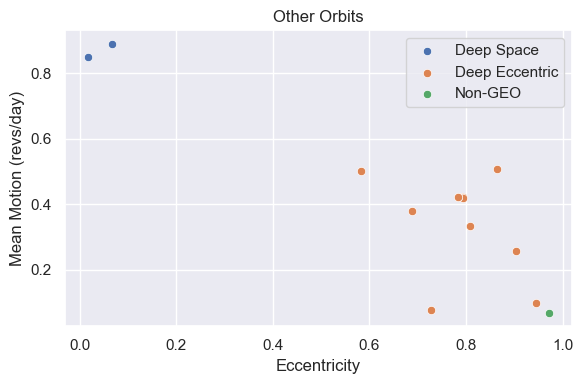

In [27]:
fig,ax = plt.subplots(figsize=(6,4))
sns.scatterplot(data=df[df['Orbit Type']=='S4W'], x='Eccentricity', y='Mean Motion (revs/day)', ax=ax, label='Deep Space')
sns.scatterplot(data=df[df['Orbit Type']=='S4V'], x='Eccentricity', y='Mean Motion (revs/day)', ax=ax, label='Deep Eccentric')
sns.scatterplot(data=df[df['Orbit Type']=='S4C'], x='Eccentricity', y='Mean Motion (revs/day)', ax=ax, label='Non-GEO')
ax.set_title('Other Orbits')
fig.tight_layout()

In [28]:
df[df['Orbit']=='Other'].sort_values(by='Orbit Type')

,Apogee (km),Argument of Perigee (deg),Eccentricity,Inclination Angle (deg),Mean Anomaly (deg),Mean Motion (revs/day),Perigee (km),Period (minutes),Right Ascension of Ascending Node (deg),Satellite Height (km),Orbit Type,Orbit
Index,,,,,,,,,,,,
7516,489399.6730,156.3990,0.971837,27.3010,359.9900,0.068866,702.8710,20879.2780,240.9300,28832.5455,S4C,Other
2234,399941.5300,247.1080,0.728482,17.9590,35.9890,0.076173,57448.3600,18914.8700,22.8950,203447.2030,S4V,Other
4460,129927.3730,278.6918,0.687143,63.8586,1.4144,0.378058,18897.8090,3809.1940,79.8991,19256.4362,S4V,Other
4503,152240.6170,272.1249,0.808010,86.9782,0.2266,0.334090,10465.3730,4311.0190,16.2694,10260.8134,S4V,Other
8202,193335.6880,189.1252,0.904268,12.1812,353.9625,0.255631,3661.9560,5631.8880,127.3279,16546.5101,S4V,Other
8204,117643.8680,42.3214,0.864635,1.3684,352.1668,0.506170,2625.3420,2843.8080,279.1389,13580.6029,S4V,Other
8918,99488.1387,118.2027,0.581543,57.2339,355.5820,0.501288,21632.8160,2872.8672,104.6286,22402.9967,S4V,Other
9042,128553.1550,34.5254,0.793377,103.6913,0.8744,0.420661,9167.9030,3423.0330,183.2835,9835.0745,S4V,Other
9044,128613.9720,34.6102,0.793161,103.6778,357.4908,0.420301,9193.0020,3425.9650,183.2005,9822.1746,S4V,Other


### S4W DEEP SPACE
1739 and 5495 (24891) not on GEO or HEO list, but in complete space track catalog - So will leave as Others

### S4C Non GEO
7516 - (25383) - non-earth orbit planned to go to Mars - https://science.nasa.gov/mission/nozomi/

### S4V
8202,9164 not in space track TLE catalog

#### In HEO catalog
2234 - 22049  
4460 - 25867  
4503 - 27540  
8918 - 25989  
9042  
9044  
9050  
9052  




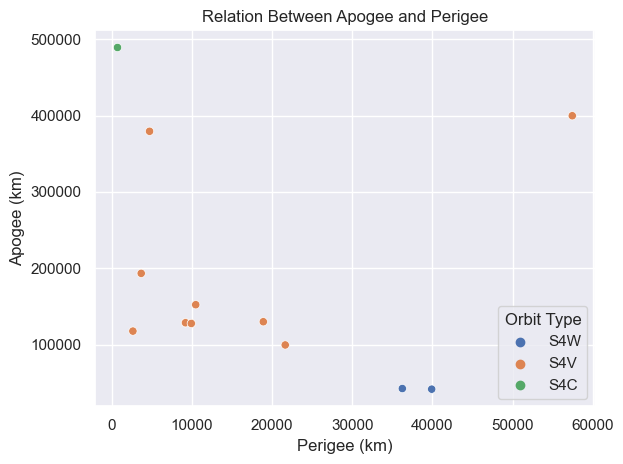

In [29]:
fig,ax = plt.subplots()
sns.scatterplot(data=df[df['Orbit']=='Other'], x='Perigee (km)', y='Apogee (km)', ax=ax, hue='Orbit Type')
ax.set_title('Relation Between Apogee and Perigee')
fig.tight_layout()

## Make changes to DataFrame

In [47]:
df.loc[df['Orbit']=='Other','Orbit'] = 'Deep Space'
df_og = df.copy() # save a copy of the original dataframe
for orbit, index_list in change_to_dict.items():
    df.loc[index_list,'Orbit'] = orbit
df.drop('Orbit Type',axis=1,inplace=True)

In [48]:
df.Orbit.value_counts()

Orbit
LEO           526
GEO           374
MEO            74
HEO            34
Deep Space     14
Name: count, dtype: int64

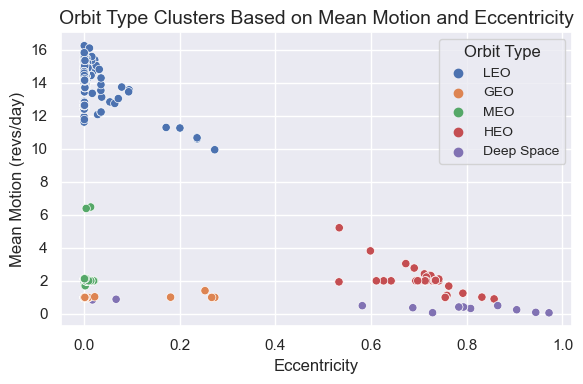

In [49]:
fig,ax = plt.subplots(figsize=(6,4))
sns.scatterplot(data=df, x='Eccentricity', y='Mean Motion (revs/day)', ax=ax, hue='Orbit')
ax.set_title('Orbit Type Clusters Based on Mean Motion and Eccentricity',fontsize=14)
ax.legend(fontsize=10,title='Orbit Type')
fig.tight_layout()

In [50]:
df.head()

,Apogee (km),Argument of Perigee (deg),Eccentricity,Inclination Angle (deg),Mean Anomaly (deg),Mean Motion (revs/day),Perigee (km),Period (minutes),Right Ascension of Ascending Node (deg),Satellite Height (km),Orbit
Index,,,,,,,,,,,
22,765.7014,267.0532,0.008423,98.0411,92.1020,14.551266,646.3658,98.9579,253.8068,714.6309,LEO
56,825.0476,60.0823,0.000147,98.8113,300.0459,14.195652,822.9273,101.4365,256.7802,829.2057,LEO
79,36398.5676,309.9278,0.001414,6.7561,49.8750,0.983356,36280.0097,1464.3024,68.4552,36299.3140,GEO
197,35793.0308,25.5105,0.000132,0.0474,154.4285,1.002725,35781.8654,1436.0272,66.5771,35790.9447,GEO
198,35791.0761,157.1359,0.000075,0.0261,113.8384,1.002708,35784.7765,1436.0284,28.6118,35787.6405,GEO


## Split Data into Train/Validation/Test

In [61]:
from sklearn.model_selection import train_test_split

df = df_og.drop('Orbit Type',axis=1).copy()
X = df.loc[:, df.columns != 'Orbit']
y = df.loc[:, df.columns == 'Orbit']

# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
# Split Training into Train and Validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=49)

print('Train set shape\n',X_train.shape, y_train.shape)
print('Val set shape\n',X_val.shape, y_val.shape)
print('Test set shape\n',X_test.shape, y_test.shape)


Train set shape
 (612, 10) (612, 1)
Val set shape
 (205, 10) (205, 1)
Test set shape
 (205, 10) (205, 1)


---
# Modeling

### Metrics
Plan to use f1, precision, and recall as the primary metrics since the classes are unbalanced, and some classes are more important. The most important orbits to not misidentify are LEO, GEO and HEO. It would be better to mislabel MEOs as LEO or GEO rather than the otherway around. The Deep Space class is the least important.

## Trivial Model
### Always Predict Majority Class (LEO)

### Randomly Predict Class

## Classical Modeling

In [62]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

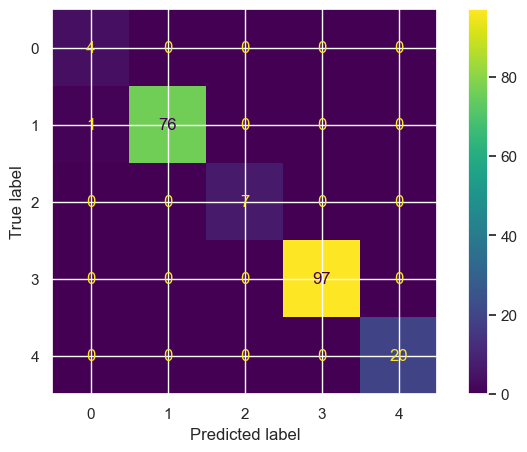

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmp.plot(ax=ax)
plt.show();

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Deep Space       0.80      1.00      0.89         4
         GEO       1.00      0.99      0.99        77
         HEO       1.00      1.00      1.00         7
         LEO       1.00      1.00      1.00        97
         MEO       1.00      1.00      1.00        20

    accuracy                           1.00       205
   macro avg       0.96      1.00      0.98       205
weighted avg       1.00      1.00      1.00       205

